<a href="https://colab.research.google.com/github/OlgaKantarzhy/data-and-python/blob/main/The_Bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Bank Project
---



## Olga Kantarzhy
###October, 2023
---




## Objectives
Customer churn can have a significant financial impact on banks. When customers close their accounts, withdraw their deposits, or transfer their loans to other institutions, it can result in a loss of revenue. Analyzing churn helps banks understand the scale of the financial impact and take measures to mitigate it.

This project used Python to help the bank improve customer retention rates by identifying and addressing the factors that are driving customers to leave.

The main objective is to discover valuable information about customers and investigate the correlation (if any) between different factors related to demographics, finances, and product usage that are found within the dataset.

Business Goal is to find the characteristics of a customer that is no longer an existing card holder.

---


## The dataset
_This dataset was originally retreived from https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

It includes data about more than 10,000 customers, containing information such as age, salary, marital status, credit card limit, credit card category, etc. There are almost 18 features in total.


In [2]:
#Importing libraries
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [3]:
#Retrieving data
df = pd.read_csv("https://raw.githubusercontent.com/OlgaKantarzhy/data-and-python/main/Data%20Sets/BankChurners.csv")

#Removing last two columns as advised by the data source (as they indicate naive bayes classifier attrition prediction score)
df = df[df.columns[:-2]]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
## Describing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
print("The dataset has",df.shape[1],"columns and",df.shape[0], "rows")

The dataset has 21 columns and 10127 rows


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## Cleaning the data



In [ ]:
## Checking for missing values
missing_values = df.isnull().sum()
missing_values

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values in the dataset.

In [ ]:
#checking for duplicates in CLIENTNUM column
duplicates = df.duplicated().sum()
duplicates

0

There're no duplicate values in the dataset.

## Analysing the data

---
Let's have a closer look at the attrited customers.


Filter out the attrited customers and display summary statistics.

In [ ]:
attrited = df[df['Attrition_Flag'] == "Attrited Customer"]
attrited.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


The youngest and the oldest customers:

In [ ]:
print("The youngest attrited customer was", attrited["Customer_Age"].min(),"years old.")
print("The oldest attrited customer was", attrited["Customer_Age"].max(),"years old")

The youngest attrited customer was 26 years old.
The oldest attrited customer was 68 years old


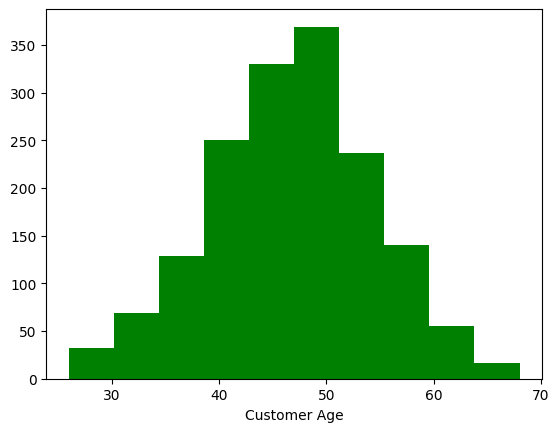

In [ ]:
plt.hist(attrited["Customer_Age"], color = "green")
plt.xlabel("Customer Age")
plt.show()

From the above graph we can see that the customer ages in the dataset follows a normal distribution.

The education ranges for attrited customers:

In [ ]:
education_groups = attrited.groupby("Education_Level")["CLIENTNUM"].count()
education_groups.sort_values(ascending = False)

Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: CLIENTNUM, dtype: int64

The majority of the attrited customers has graduate degrees, and the smallest group of the attrited customers has post-graduate degrees. There's a group of 256 clients for whom the education level is unknown.

Let's compare the education groups for both existing and attrited customers.

In [ ]:
education_groups_by_attrition = df.groupby(["Attrition_Flag","Education_Level"])["CLIENTNUM"].count()
education_groups_by_attrition

Attrition_Flag     Education_Level
Attrited Customer  College             154
                   Doctorate            95
                   Graduate            487
                   High School         306
                   Post-Graduate        92
                   Uneducated          237
                   Unknown             256
Existing Customer  College             859
                   Doctorate           356
                   Graduate           2641
                   High School        1707
                   Post-Graduate       424
                   Uneducated         1250
                   Unknown            1263
Name: CLIENTNUM, dtype: int64

We can see the statistics for the existing customers is slightly different: the majority still falls into "graduate" category but the smallest group has "doctorate" level.

Now let's display for how long the attrited customers had been with the bank before they left.

In [ ]:
print("The shortest period with the bank for an attrited customer is" , attrited["Months_on_book"].min(), "months.")
print("The longest period with the bank among the attrited customers equals to", attrited["Months_on_book"].max(), "months.")

The shortest period with the bank for an attrited customer is 13 months.
The longest period with the bank among the attrited customers equals to 56 months.


Let's display the income groups for the attrited customers:

In [ ]:
attrited.groupby(["Income_Category"])["CLIENTNUM"].count()

Income_Category
$120K +           126
$40K - $60K       271
$60K - $80K       189
$80K - $120K      242
Less than $40K    612
Unknown           187
Name: CLIENTNUM, dtype: int64

Let's calculate the average period the customers of different income groups had spent with the bank before they left.

In [ ]:
df.groupby(["Income_Category"])["Months_on_book"].mean()

Income_Category
$120K +           36.891334
$40K - $60K       35.873184
$60K - $80K       35.597004
$80K - $120K      36.074267
Less than $40K    35.881775
Unknown           35.753597
Name: Months_on_book, dtype: float64

We can see that the average periods for all the income groups are very close one to another, which means there's no particular impact of the income level to the period, during which a particular customer stays with the bank.

Let's analyse the credt card limits the attrited customers had

In [ ]:
attrited.agg({
    "Credit_Limit":["min","max"]
    })

,Credit_Limit
min,1438.3
max,34516.0


The smallest credit limit equals to $1438.3 and the largest limit is 34,516.0

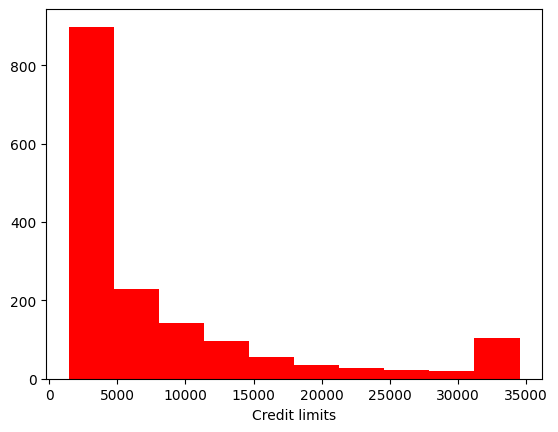

In [ ]:
plt.hist(attrited["Credit_Limit"], color = "red")
plt.xlabel("Credit limits")
plt.show()

From the above chart we see that the majority of the credit limits of the attrited customers were less then $5000.

## Visualising the data

---



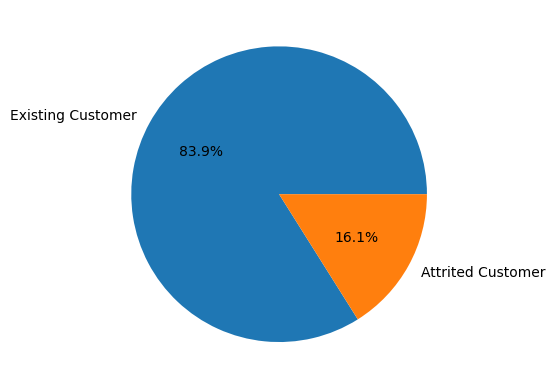

In [ ]:
churn = df['Attrition_Flag'].value_counts()
plt.pie(churn,labels = churn.keys(), autopct='%1.1f%%')
plt.show()

The Attrition Flag data is imbalanced, which means the predictions might make false positive/negative.

Now let's focus on Customer demographics. We can identify the following demografic factors available within the dataset:

- Age
- Gender
- Income
- Marital Status
- Education

<Axes: xlabel='Attrition_Flag'>

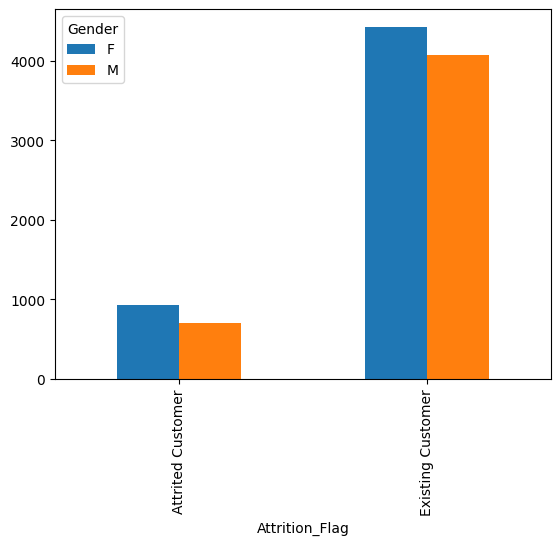

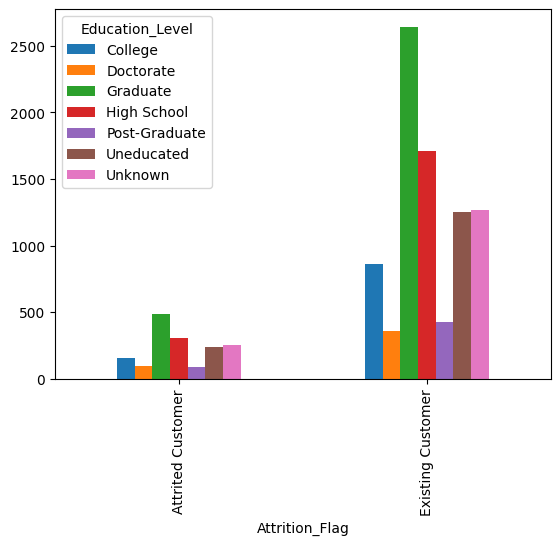

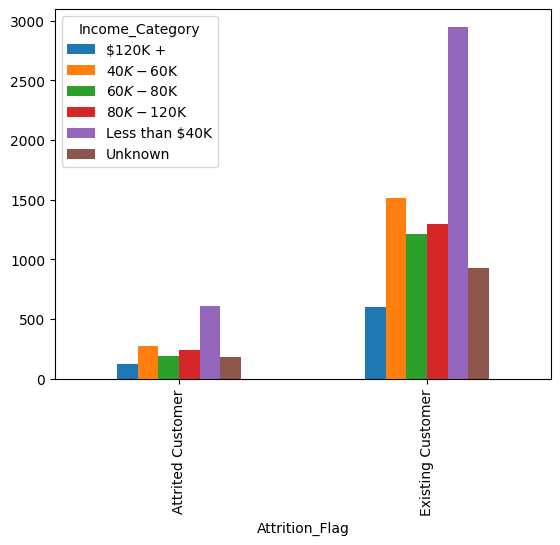

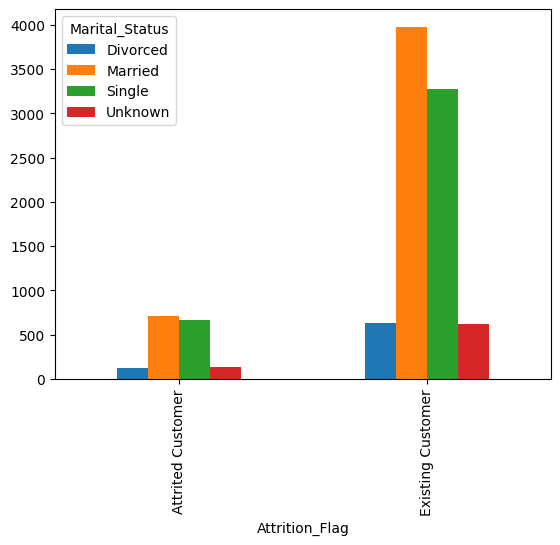

In [ ]:
## plotting customers distribution by demografics
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind = 'bar')
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind = 'bar')
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind = 'bar')
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind = 'bar')


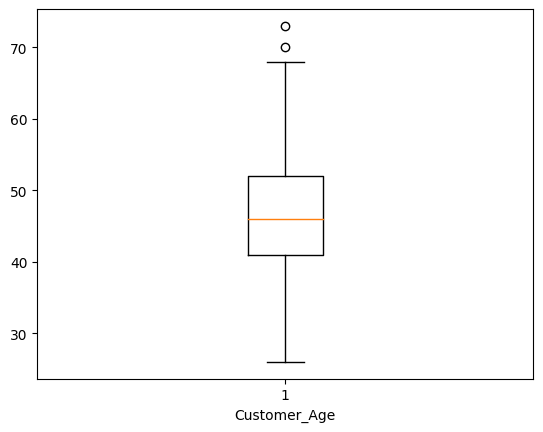

In [ ]:
age = df["Customer_Age"]
plt.boxplot(age)
plt.xlabel("Customer_Age")
plt.show()

The boxplot shows there're two customers in the dataset whose age stands beyond the age range - 71 and 73 years.  

Customer demographic observations:
- Married females customers with graduate degree and income lesser than 40k make up the majority of the attrited customers. Followed by single female customers with annual salary 40k-60k.

###Correlation within the dataset

Let's calculate correlation coefficients (r) across numeric data. The closer r is to -1 or 1, the stronger the correlation between the variables.

In [ ]:
df.corr(numeric_only = True)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


The below are some correlations we can observe:
- strong positive: Customer_Age & Months_on_book (r = 0.79), Avg_Open_To_Buy& Credit_Limit (r = 0.995), Total_Trans_Amt& Total_Trans_Ct (r = 0.8)
- weak negative: Total_Relationship_Count & Total_Trans_Amt (r = - 0.35)
- weak positive: Total_Trans_Amt& Credit_Limit (r= 0.17)

Let's plot a regression line between Customers age and Month they're with the bank.

LinregressResult(slope=0.7859210057646278, intercept=-0.48013611211955265, rvalue=0.788912358993052, pvalue=0.0, stderr=0.006083850820980082, intercept_stderr=0.28602883877641516)


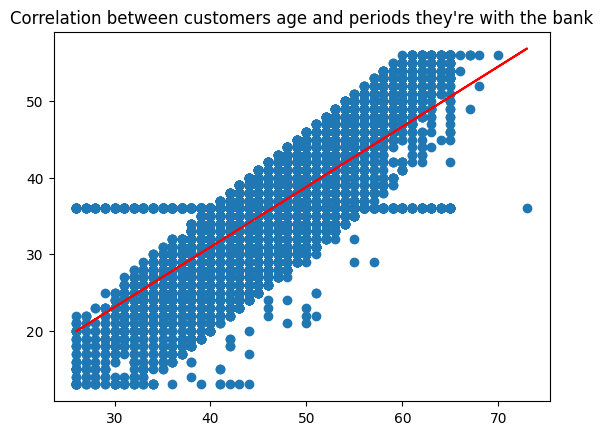

In [5]:
age = df["Customer_Age"]
month = df["Months_on_book"]
regression = linregress(age,month)
print(regression)
slope=regression.slope
intercept = regression.intercept
plt.scatter(age,month)
plt.plot(age, slope*age + intercept, color="red")
plt.title("Correlation between customers age and periods they're with the bank")
plt.show()

Now let's write a function that checks the significance of a regression by calculaing the P-value coefficient and run it for our Cusomers_Age and Months_on_book data to see if their correlation is statistically significant.

In [6]:
def check_pvalue(x,y):
  regression = linregress(x,y)
  if regression.pvalue < 0.5:
    print("Model is considered to be statistically significant")
  else:
    print("Model is not considered to be statistically significant")

check_pvalue(age, month)

Model is considered to be statistically significant


# Summary

To sum up, the insights gained from this analysis shed light on the bank customers profiles with regards to the customers churn.

Among them are the following:

- both male and female customers have similar levels of account retention, but the attrition rate is slightly higher among female customers
-  the attrited customers dataset falls within the normally distributed age range of 26 to 68
- the largest segment of the attrited customers belongs to those with a Graduate level of education when Doctorate holders are the smallest group
- a substantial proportion of bank customers (35.2%) have lower incomes (less then 40K)
- the majority of the credit limits of the attrited customers were less then $5000
- an average customer normally leaves the bank after 36 months
- there's a strong positive correlation between a customer's age and the period he/she stays with the bank: the older a customer - the longer he/she sticks to a bank
- there have also been observed other correlatios: a strong positive correlation between a customer's willingness to buy a bank service and his/her credit limit, between total amount of transactions and total transactions count, a weak negative correlation between total relationship count (which means the level of customers' engagement with the bank) and total amount of transactions made by customers.